In [3]:
import MDAnalysis
import MDAnalysis.analysis.rdf as rdf
import MDAnalysis.coordinates.timestep as ts
import MDAnalysis.transformations as transformations

import numpy as np
import matplotlib.pyplot as plt


In [6]:
cd ../Water

/scratch/work/courses/CHEM-GA-2671-2022fa/kjt9860/comp-lab-class/comp-lab-class/Week12/Runs/Water


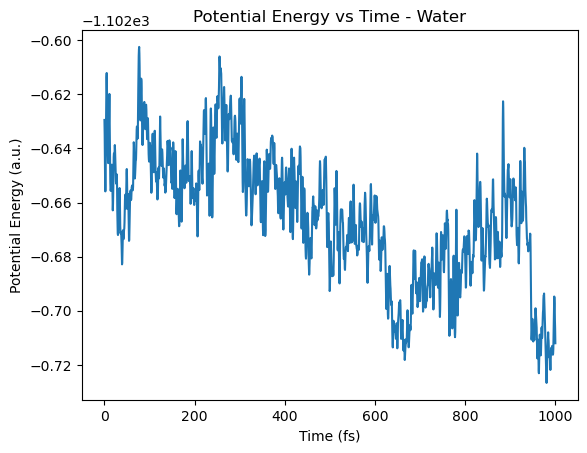

In [8]:
# plot potential energy vs time

f = np.loadtxt('water_aimd_1ns_every0.5fs-1.ener')

times = f[:, 1]

PE = f[:, 4]

plt.plot(times, PE)
plt.xlabel('Time (fs)')
plt.ylabel('Potential Energy (a.u.)')
plt.title('Potential Energy vs Time - Water')
plt.savefig('Potential EnergyvsTime.png')
plt.show()

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


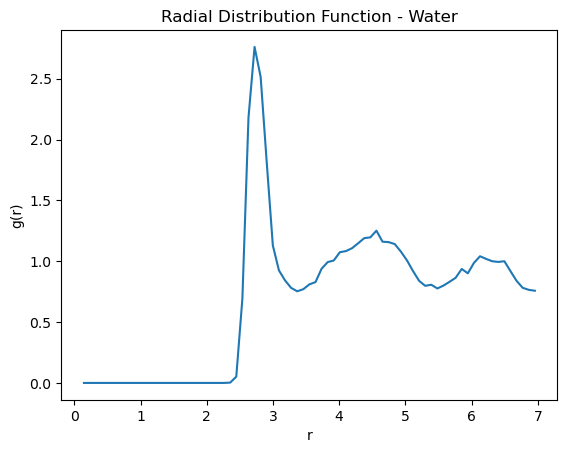

In [9]:
# plot rdfs

#set box dimensions
transform = transformations.boxdimensions.set_dimensions([12.42, 12.42, 12.42, 90, 90, 90])

u = MDAnalysis.Universe('water.xyz', 'water_aimd_1ns_every0.5fs-pos-1.xyz', transformations=transform) 

RDF = rdf.InterRDF(u.select_atoms('name O'), u.select_atoms('name O'), range=(0.1, 7))
RDF.run()

plt.plot(RDF.results.bins, RDF.results.rdf)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Radial Distribution Function - Water')
plt.show()